# Visual Exploration of Derivatives

It is important to understand derivatives to fully grasp the inner workings of a neural network. Here we'll explore derivatives at a visual level (rather than a strictly formula-based one) to best understand its relevance in our ML models.

<!-- (This exploration is very much inspired by Andrej Karpathy's video on Micrograd). -->

A derivative tells us how sensitive a function's output is to small changes in the input. To help us explore this more in-depth, let's import some basic dependancies.

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Great, now we're ready to make a simple function to explore. Here I chose the vertical projectile motion formula:

$$y = y₀ + v₀yt - (9.8/2)t²$$

I'll renamed the function to `height(time)` to make its functonality clear, but the formula will stay the same. In this example, we'll say the ball was thrown upwards from 10 m off the ground with a velocity of 20 m/s. 

In [3]:
def height(time):
    """ Return the height of a ball at a given time. """
    return 10 + 20 * time - 9.8/2 * time**2

To get the general idea of this function, let's check where the ball would be at different times.

In [4]:
time = 0.5
print(f"The ball's height at time {time} is {height(time)}")
time = 3
print(f"The ball's height at time {time} is {height(time)}")

The ball's height at time 0.5 is 18.775
The ball's height at time 3 is 25.9


<!-- We can see that the function's output changed between  -->

<!-- Pretty simple, right? So how does calculus tie in?: -->

Now that we have a function, let's explore how calculus ties into this. 

Calculus tells us what happens when we increase the input—in this case, `time`—by a tiny amount. 

To make this easier to understand, let's try this function with many evenly-spaced values within a small range.

In [5]:
# Make an array of 101 evenly-spaced values to try in the function.
times = np.linspace(0, 5, 101)
print(times)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45
 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15
 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85
 4.9  4.95 5.  ]


Now let's see the results we get when we input these values into our function.

In [6]:
# We can use the function on the full array at once thanks to NumPy's broadcasting.
heights = height(times)
print(heights)

[ 10.       10.98775  11.951    12.88975  13.804    14.69375  15.559
  16.39975  17.216    18.00775  18.775    19.51775  20.236    20.92975
  21.599    22.24375  22.864    23.45975  24.031    24.57775  25.1
  25.59775  26.071    26.51975  26.944    27.34375  27.719    28.06975
  28.396    28.69775  28.975    29.22775  29.456    29.65975  29.839
  29.99375  30.124    30.22975  30.311    30.36775  30.4      30.40775
  30.391    30.34975  30.284    30.19375  30.079    29.93975  29.776
  29.58775  29.375    29.13775  28.876    28.58975  28.279    27.94375
  27.584    27.19975  26.791    26.35775  25.9      25.41775  24.911
  24.37975  23.824    23.24375  22.639    22.00975  21.356    20.67775
  19.975    19.24775  18.496    17.71975  16.919    16.09375  15.244
  14.36975  13.471    12.54775  11.6      10.62775   9.631     8.60975
   7.564     6.49375   5.399     4.27975   3.136     1.96775   0.775
  -0.44225  -1.684    -2.95025  -4.241    -5.55625  -6.896    -8.26025
  -9.649   -11.06225 -

It's tricky to see what is going on with those numbers. Luckily, we can make this much easier to follow by making a simple graph showing the ball's height different times.

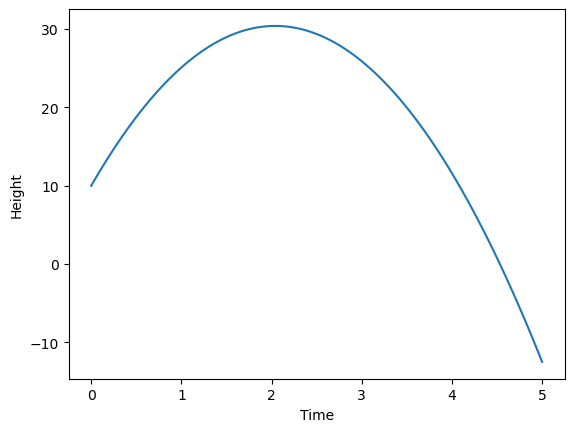

In [27]:
plt.xlabel("Time")
plt.ylabel("Height")
plt.plot(times, heights)

As was previously mentioned, a derivative tells us how sensitive a function's output is to small changes in the input. What that means is that if we start with a certain input (say, `time = 1`) and increase it by some incredibly small amount, the derivative tells us how much that slight nudge will change the output. In the case of this example function, we can use the derivative to see how much the ball moves between `time = 1` and some slight moment later.

Formally, the definition of the derivative looks like this:

$$\lim_{h \to 0} \frac{f(a+h) - f(a)}{h}$$

Here, the function $f$ represents our `height` function. $a$ is the input we're choosing to zoom in on, which in the case of our function would be the selected `time` we wish to explore. $h$ is the incredibly small amount that we will nudge that chosen input to determine how much that change impacts the output (the ball's position). The $h \to 0$ means that h should be so small that it is nearing 0.

<!-- (in our case, this would be the time we are testing) -->

<!-- where $a$ is the input  -->

<!-- We'll break this formula down in a moment to make it more intuitive, but first let's go over what the formula is supposed to tell us. -->

<!-- This formula tells us how much the output (height)  -->

<!-- Let's break this formula down to make it more intuitive. -->

<!-- If we choose some input $a$ (or in our case, $time$) and increase it by some incredibly small amount $h$, this formula shows us how much that slight nudge impacts the output. -->

Now that we understand the purpose of the formula, let's break down how the formula tells us that information. To do that, let's pick the time we will explore in the ball's motion. Here we'll check the ball's position at time 1. 

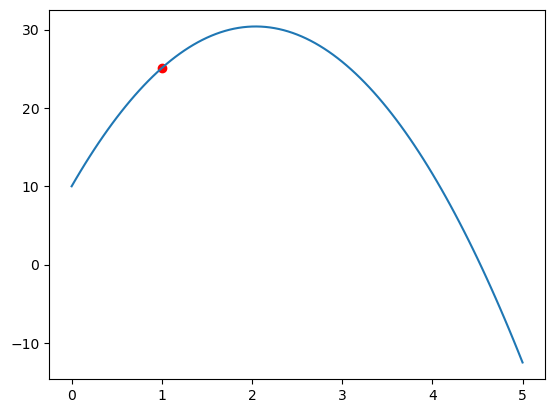

In [33]:
# Using the same graph, let's see the height at time 1.
plt.plot(times, heights)
plt.scatter([1], [height(1)], color="red")

From the graph, we can see that the ball's height when time is 1 is approximately 25. Let's find the exact value.

In [19]:
# Using `a` for the time to match the derivative definition.
a = 1
height(a)

25.1

From the graph, it seems that increasing `a` slightly would increase the ball's position. To confirm, let's check the ball's position 0.001 seconds later.

In [38]:
# h is the amount we nudge the input by.
h = 0.001
new_height = height(a + h)

print(f"After slightly increasing the time, the ball's new height is now {new_height}.")

After slightly increasing the time, the ball's new height is now 25.1101951.


<!-- The number we got now is a bit larger than it was before, so we can tell that  -->

As expected from what we can see on the graph, the ball at this new time is slightly higher than it was just earlier. What if we nudged the chosen time `a` by an even smaller value, say, 0.00000001?

In [21]:
# h is the amount we nudge the input by.
h = 0.00000001
height(a + h)

25.100000102

Unsurprisingly, that also increased the ball's height, albeit by a smaller amount than before. The derivative finds out how much the position changes when h is infinitely small, but 0.00000001 is small enough an example for our exploration. To find out exactly how much the ball moved between time `a` and time `a + h` (the time slightly after time `a`), we can subtract the original position from the newly shifted position, like so:

$$height(a + h) - height(a)$$

In [22]:
# Find out how much the height changed.
height(a + h) - height(a)

1.019999977813768e-07

Then, since we shifted over by $h$, we'll need to divide by $h$ to find out how much the height shifted over a single unit of time. That gives us this formula:

$$\frac{f(a+h) - f(a)}{h}$$

In [25]:
# Let's find how much it changed in a single unit of time.
(height(a + h) - height(a)) / h

10.19999977813768

Of course, ideally we'd want $h$ even smaller, so small that it approaches 0. To show that, we'd write the formula like so:

$$\lim_{h \to 0} \frac{f(a+h) - f(a)}{h}$$

And with that, we've just derived the formula for finding a derivative.

<!-- In machine learning, derivatives are very important to optimizing our model parameters. They tell us how much a small adjustment to  -->

BONUS: 

Since derivatives are all about finding how much a small change to an input impacts the output, this makes them incredibly useful for machine learning. Neural networks in ML rely on many parameters that impact the final result of the model. In order to optimize those values, we need to know how much a small change in one of the parameters will impact the final result of the model. And as we've just seen, we can use derivatives to find exactly that. Once we find the derivative of the parameter, we can make slight adjustments to that parameter in the direction that most optimizes our model. This process is called gradient descent.

<!-- We want to optimize those parameters, and to do that, we  -->